<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/SH22Hwang-patch-1/seunghyeon/Excercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심화문제 9

- sh22h 황승현

## 심화문제 9-1

> 합성곱 신경망을 사용하는 것이 완전 연결 심층 신경망을 사용하는 것보다 좋은 점을 2가지 이상 서술하라

1. 희소 상호작용
  - CNN은 국소적인 영역에 작은 필터를 적용하여 특징을 추출한다
  - 픽셀들 사이의 관계 다룰 필요없음, 신호 사이의 연결 개수 줄임

2. 파라미터 공유
  - 적은 수의 파라미터를 모든 영역에 적용(필터)
  - 연산량 감소

3. 등변성 표현
  - 입력에 특정한 변경을 적용하면 출력도 같은 방식으로 변함
  - 외곽선 추출같은 함수가 어디서나 사용 가능


## 심화문제 9-2

- MNIST 데이터 CNN
- 훈련 60000, 테스트 10000
- 필터의 크기: 3X3
- 필터 이미지의 개수: 128개
- 스트라이드: 2
- 패딩: same
- 맥스풀링할 크기: 2x2
- 활성화 함수: ReLU
- 정확도 98% 이상

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from keras import models, layers 
from keras.models import Model
import pandas as pd
# from tensorflow.keras.optimizers import RMSprop

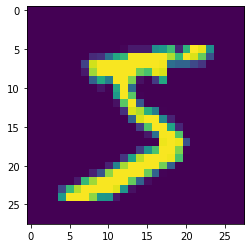

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련데이터는 60000개, 검증 데이터는 10000개
x_train, x_test = x_train[:60000] / 255.0, x_test[:10000] / 255.0 # 데이터 스케일링
y_train, y_test = y_train[:60000], y_test[:10000]
plt.imshow(x_train[0])

x_train = x_train[:, :, :, np.newaxis] # 한 차원 추가함. 데이터의 채널정보 추가
                                       # 합성곱 신경망의 입력: 데이터 인스턴스, 데이터의 행 수, 데이터의 열 수, 채널 수
x_test = x_test[:, :, :, np.newaxis]

In [7]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
model = models.Sequential([
  layers.Conv2D(input_shape = (28, 28, 1), # MNIST 이미지의 크기 
                kernel_size = (3,3), # 필터의 크기 3X3
                filters = 128), # 필터 이미지의 개수 128

  layers.MaxPooling2D((2, 2), strides=2), # 스트라이드: 2
                                          # 맥스풀링할 크기: 2x2
                                          # 이미지 반으로 줄어듦
  layers.Conv2D(kernel_size = (3,3), padding='same', filters = 64), # 패딩 same

  layers.Flatten(),
  layers.Dense(128, activation='relu'), # 활성화 함수 ReLU
  layers.Dense(128, activation='relu'), # 활성화 함수 ReLU
  layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 160s 113ms/step - loss: 0.1747 - accuracy: 0.9469 - val_loss: 0.0795 - val_accuracy: 0.9750
Epoch 2/10
1407/1407 [==============================] - 160s 114ms/step - loss: 0.0762 - accuracy: 0.9779 - val_loss: 0.0852 - val_accuracy: 0.9751
Epoch 3/10
1407/1407 [==============================] - 162s 115ms/step - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0937 - val_accuracy: 0.9751
Epoch 4/10
1407/1407 [==============================] - 165s 117ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0860 - val_accuracy: 0.9769
Epoch 5/10
1407/1407 [==============================] - 164s 117ms/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 0.0727 - val_accuracy: 0.9813
Epoch 6/10
1407/1407 [==============================] - 165s 117ms/step - loss: 0.0341 - accuracy: 0.9901 - val_loss: 0.0783 - val_accuracy: 0.9809
Epoch 7/10
1407/1407 [==============================] - 164s 117ms/step - loss: 0.0327 - accuracy: 0.9905 - val_

In [ ]:
history.history
loss, acc = model.evaluate(x_test, y_test)

print(f"""
합성곱 신경망 모델의 학습결과:
테스트 데이터의 손실값: {loss:.2f} 테스트 데이터의 정확도: {acc:.2f}
""")

313/313 [==============================] - 8s 25ms/step - loss: 0.0846 - accuracy: 0.9830

합성곱 신경망 모델의 학습결과:
테스트 데이터의 손실값: 0.08 테스트 데이터의 정확도: 0.98



In [ ]:
loss

0.08456005156040192

In [ ]:
acc

0.9829999804496765